In [2]:
import cv2
import os
import fnmatch
import time
import itertools
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


In [37]:
# start = time.time()
source_path = r'D:\analysis\wet_day_203\OPTICAL203_20201119080752545056_.jpg'
source_path = source_path.replace('\\', '/')

# sample_num = 200
# img_list = [f'{source_path}/{img}' for img in fnmatch.filter(os.listdir(source_path), '*.png')]
# img_list = fnmatch.filter(os.listdir(source_path), '*.jpg')

# img_list = img_list[:sample_num]

ROI = [(1, 14), (1, 15), (2, 14), (2, 15), (3, 14), (3, 15)] 

width, height = 150, 150


In [4]:
class img_load:
    def __init__(self, path):
        self.path = path

    def __iter__(self):
        for img in self.path:
            img = f'{source_path}/{img}'
            # img = os.path.join(source_path, img)
            yield cv2.imread(img)

In [38]:
roi_set = []
img = cv2.imread(source_path)
for (i, j) in ROI:
    x, y = i * width, j * height
    roi_img = img[y:y + height, x:x + width]
    roi_set.append(roi_img)

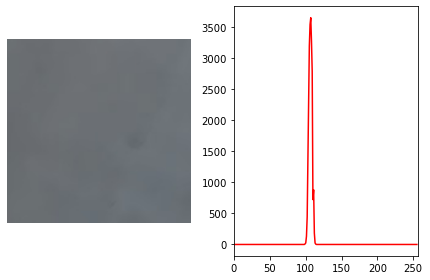

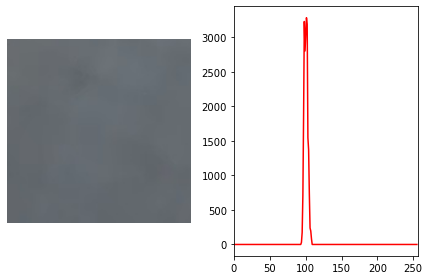

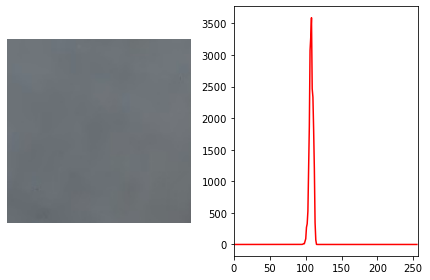

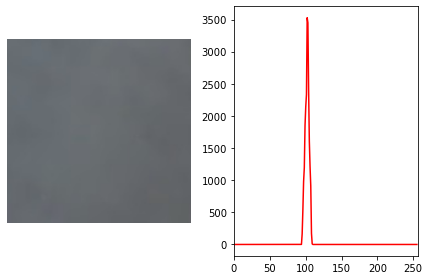

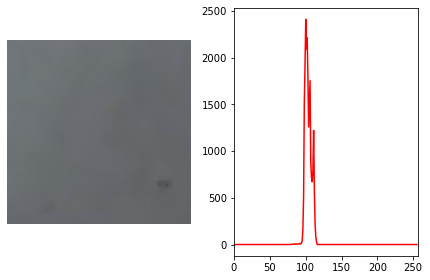

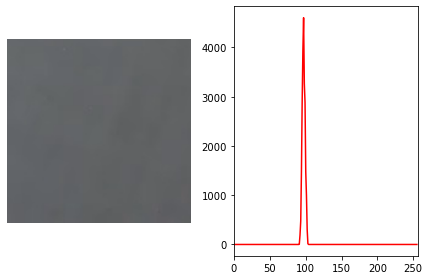

In [39]:
for i in roi_set:
    hist = cv2.calcHist([i], [0], None, [256], [0, 256])

    plt.subplot(121)
    plt.imshow(i, "gray")
    plt.axis("off")
    plt.subplot(122)
    plt.plot(hist, color='r')
    plt.xlim([0, 256])
    plt.tight_layout()
    plt.show()


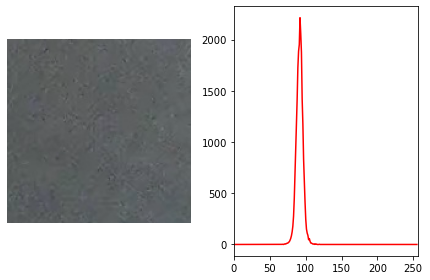

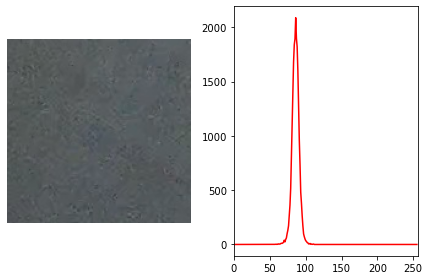

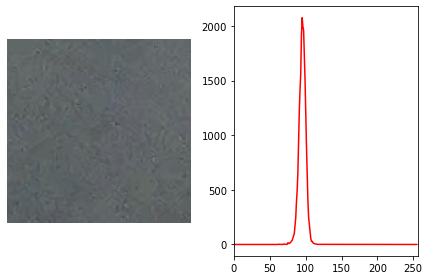

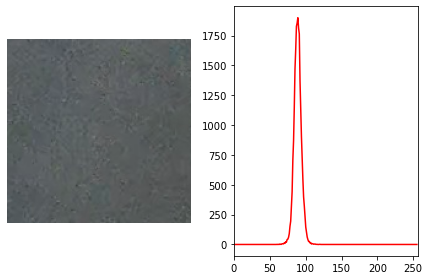

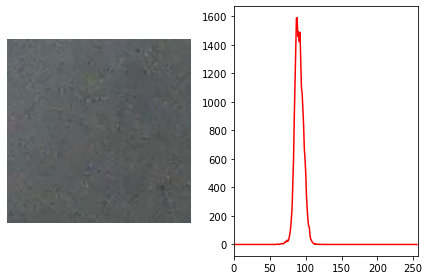

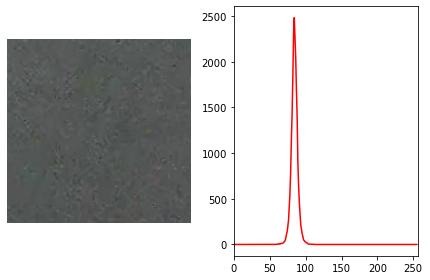

In [36]:
for i in roi_set:
    hist = cv2.calcHist([i], [0], None, [256], [0, 256])

    plt.subplot(121)
    plt.imshow(i, "gray")
    plt.axis("off")
    plt.subplot(122)
    plt.plot(hist, color='r')
    plt.xlim([0, 256])
    plt.tight_layout()
    plt.show()


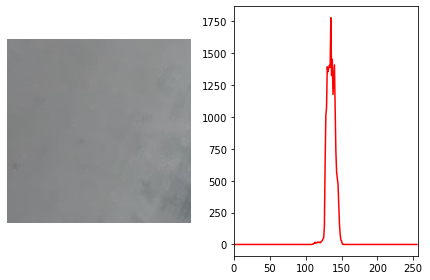

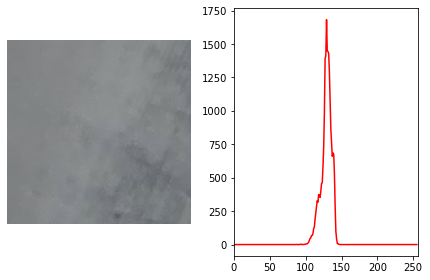

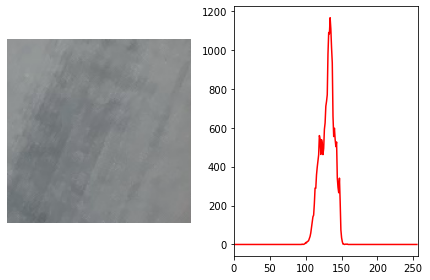

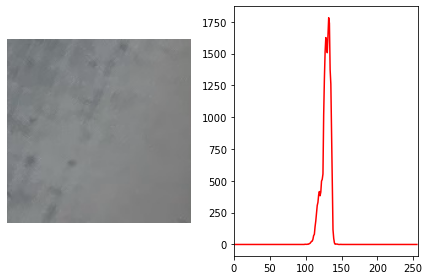

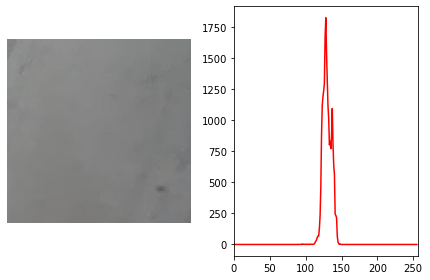

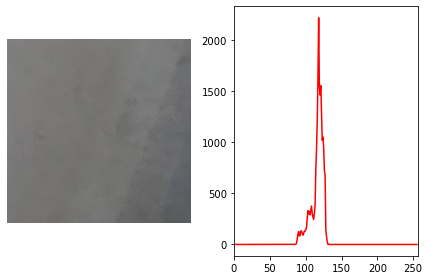

In [32]:
for i in roi_set:
    hist = cv2.calcHist([i], [0], None, [256], [0, 256])

    plt.subplot(121)
    plt.imshow(i, "gray")
    plt.axis("off")
    plt.subplot(122)
    plt.plot(hist, color='r')
    plt.xlim([0, 256])
    plt.tight_layout()
    plt.show()


In [6]:
roi_set.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
#
# def img_load(img_list):
#     for img in img_list:
#         yield from cv2.imread(img)

acc = []
for _ in tqdm(range(100)):
    start = time.time()
    roi_set = []
    img = img_load(img_list)
    for k, img in enumerate(img):
        # for k, img in enumerate(img_list):
        #     path = os.path.join(source_path, img)
        # path = f'{source_path}/{img}'
        # img = cv2.imread(path)
        for n, (i, j) in enumerate(ROI):
            x, y = i * width, j * height
            roi_img = img[x:x + width, y:y + height]
            # cv2.imwrite(f'test_{k}_{n}.png', roi_img)
            roi_set.append(roi_img)

    acc.append(time.time() - start)
    # print(img)

    

In [ ]:
mem_after = process.memory_info().rss / 1024 / 1024
print('시작 전 메모리 사용량: {} MB'.format(mem_before))
print('종료 후 메모리 사용량: {} MB'.format(mem_after))
print(' 메모리 사용량 변화: {} MB'.format(mem_after - mem_before))
print(len(roi_set))

# print(f'{time.time() - start}s')

print(f'{sum(acc) / len(acc)}s')